
First 5 rows:
          day  units_sold  price
0  2024-01-01          10   25.5
1  2024-01-02          12   26.0
2  2024-01-03           9   24.0
3  2024-01-04          14   27.0
4  2024-01-05          11   25.0

Money made from sales:
62671.5

Average units sold per transaction:
12.214285714285714

Day with the most sales:
2024-01-14


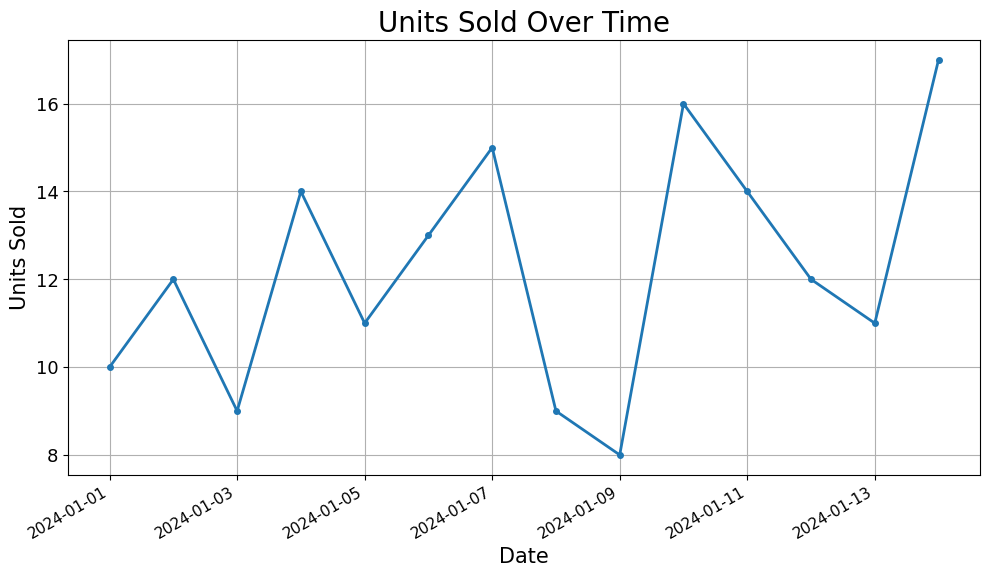


First 5 rows of temperature data:
      city  avg_temp_C  humidity
0   Warsaw         3.2        80
1   Krakow         2.5        78
2   Gdansk         4.1        82
3  Wroclaw         3.8        75
4   Poznan         3.0        77

Highest recorded temperature:
      city  avg_temp_C  humidity
2   Gdansk         4.1        82
3  Wroclaw         3.8        75
0   Warsaw         3.2        80
4   Poznan         3.0        77
1   Krakow         2.5        78

Correlation between temperature and humidity:
0.25526662818006846

Biggest deviation from mean temperature:
0.8200000000000003

City with biggest deviation from mean temperature:
['Krakow']


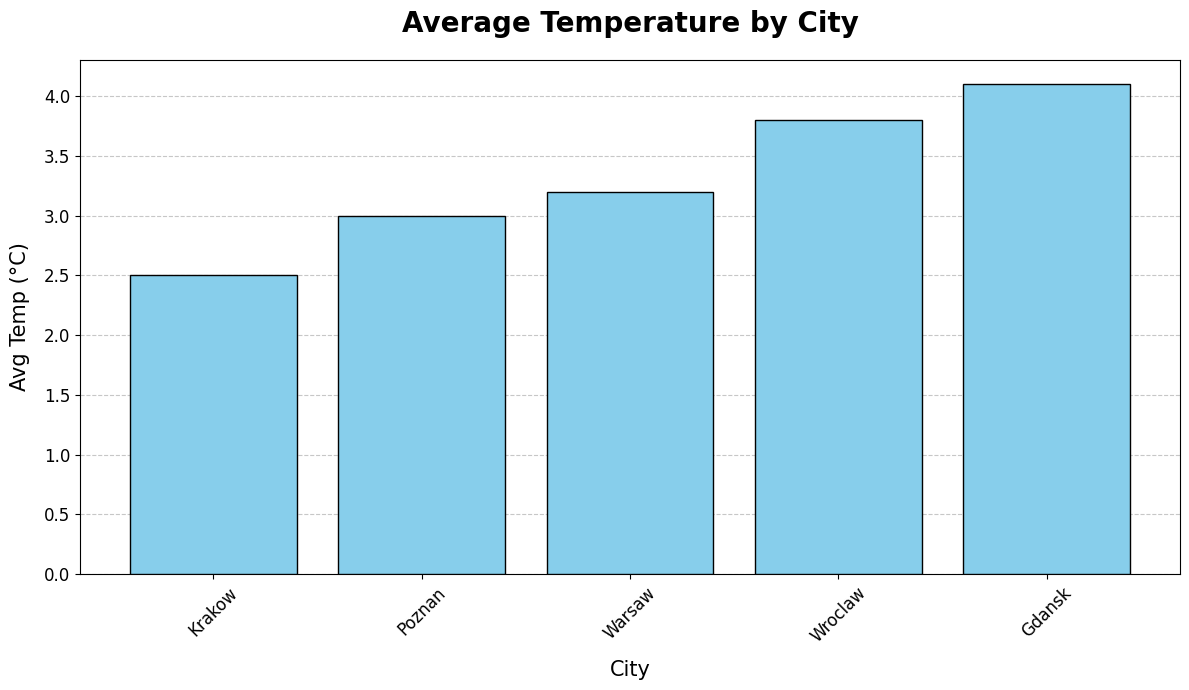

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


def file_import(file_path):
    """
    Import CSV file into DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the data from the CSV file.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"An error occurred while importing the file: {e}")
        return None
def explore_data(sales_data):
    """
    Display basic information about the data.

    Args:
        sales_data (pd.DataFrame): DataFrame with columns 'price', 'day', and 'units_sold'

    Returns:
        None
    """
    print("\nFirst 5 rows:")
    print(sales_data.head())
    sold = (sales_data['units_sold'].sum()) * (sales_data['price'].sum())
    print("\nMoney made from sales:")
    print(sold)

    avg_units_sold = sales_data['units_sold'].mean()
    print("\nAverage units sold per transaction:")
    print(avg_units_sold)

    day_with_most_sales = sales_data.groupby('day')['units_sold'].sum().idxmax()
    print("\nDay with the most sales:")
    print(day_with_most_sales)

def explore_data_temperature(temperature_data):
    """
    Display basic information about the temperature data including correlation with humidity.

    Args:
        temperature_data (pd.DataFrame): DataFrame with columns 'humidity' and 'temperature'

    Returns:
        None
    """
    print("\nFirst 5 rows of temperature data:")
    print(temperature_data.head())
    sort_temp = temperature_data.sort_values(by='avg_temp_C', ascending=False)
    print("\nHighest recorded temperature:")
    print(sort_temp)

    temp_corr = temperature_data['avg_temp_C'].corr(temperature_data['humidity'])
    print("\nCorrelation between temperature and humidity:")
    print(temp_corr)

    temp_avg = temperature_data['avg_temp_C'].sum() / temperature_data['avg_temp_C'].size
    biggest_deviation = (temperature_data['avg_temp_C'] - temp_avg).abs().max()
    print("\nBiggest deviation from mean temperature:")
    print(biggest_deviation)
    biggest_deviation_city = temperature_data.loc[(temperature_data['avg_temp_C'] - temp_avg).abs() == biggest_deviation, 'city'].values
    print("\nCity with biggest deviation from mean temperature:")
    print(biggest_deviation_city)

    
def temperature_visualisation(temperature_data):
    """Visualises average temperature per city using a bar chart.

    Args:
        temperature_data (pd.DataFrame): DataFrame with 'city' and 'avg_temp_C'.
    Returns:
        None
    """
    city_temps = temperature_data.groupby('city')['avg_temp_C'].mean().sort_values()

    fig, ax = plt.subplots(figsize=(12, 7))

    ax.bar(city_temps.index, city_temps.values, color='skyblue', edgecolor='black', zorder=3)

    ax.set_title('Average Temperature by City', fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('City', fontsize=15, labelpad=10)
    ax.set_ylabel('Avg Temp (°C)', fontsize=15, labelpad=10)

    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

    plt.tight_layout()
    plt.show()


def sales_visualisation(sales_data):
    """
    Visualise unites sold over time.

    Parameters:
        sales_data (pd.DataFrame): DataFrame with columns 'day' and 'units_sold'

    Returns:
        None
    """


    sales_data['day'] = pd.to_datetime(sales_data['day'])
    daily_sales = sales_data.groupby('day')['units_sold'].sum()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=4)
    ax.set_title('Units Sold Over Time', fontsize=20)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('Units Sold', fontsize=15)
    plt.xticks(rotation=90, fontsize=11) 
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.grid(True)
    fig.autofmt_xdate()
    plt.show()

if __name__ == "__main__":
    sales_data = file_import('./sales.csv')

    if sales_data is not None:
        explore_data(sales_data)
        sales_visualisation(sales_data)
    else:
        print("Process aborted: Could not load sales data.")

    temperature_data = file_import('./temperatures.csv')

    if temperature_data is not None:
        explore_data_temperature(temperature_data)
        temperature_visualisation(temperature_data)
    else:
        print("Process aborted: Could not load temperature data.")